In [65]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()


import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)



housing = load_housing_data()
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [66]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [67]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [68]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


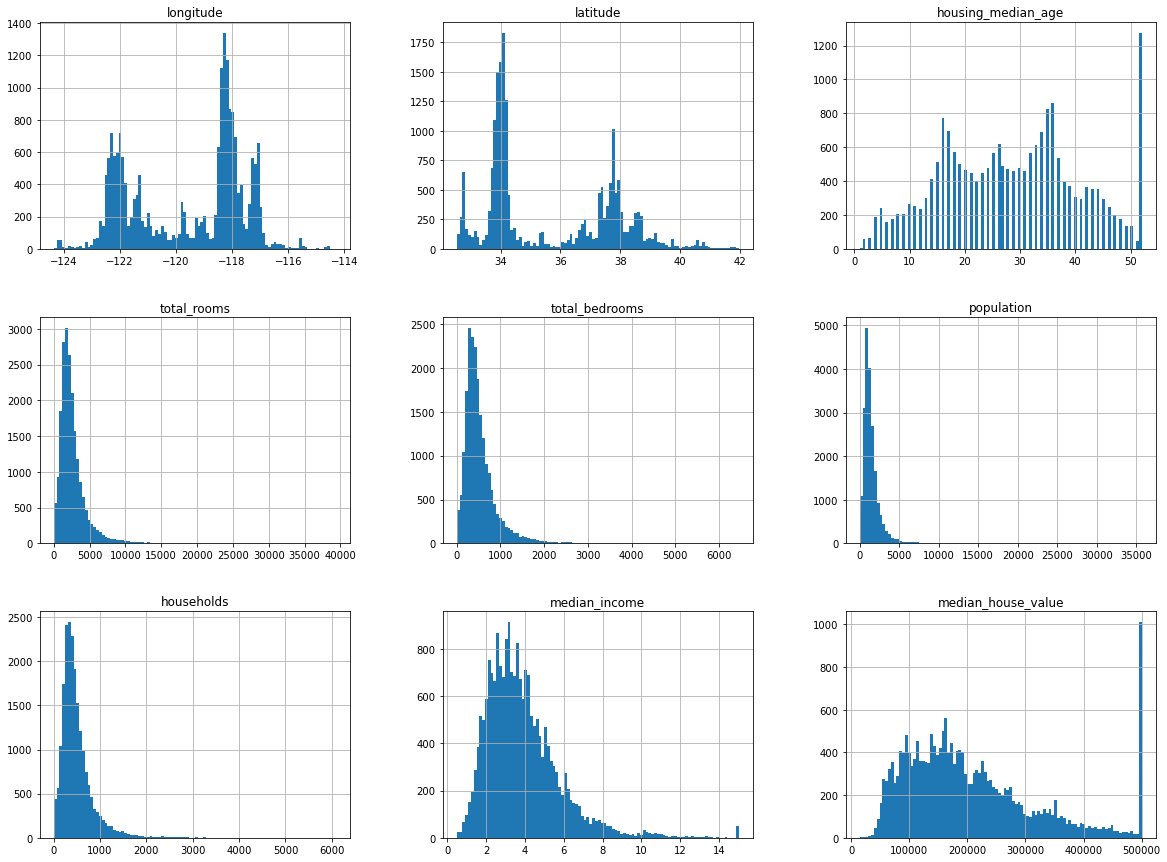

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=100, figsize=(20,15))
plt.show()

In [70]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_id=np.random.permutation(len(data))
    test_set_size=int(len(data))*int(test_ratio)
    test_id=shuffled_id[:test_set_size]
    train_id=shuffled_id[test_set_size:]
    return data.iloc[train_id], data.iloc[test_id]

In [71]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

20640

In [72]:
from zlib import crc32   #in a clever way splits data set, so on reloading it is not changed

def test_set_check(identifier, test_ratio):
 return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


housing_with_id = housing.reset_index()
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [73]:
from sklearn.model_selection import train_test_split    # or simpy you can use sktlean 
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

<AxesSubplot:>

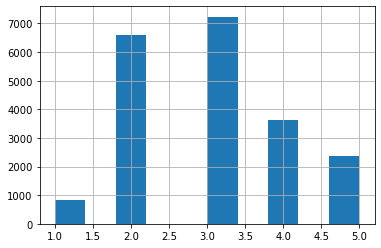

In [74]:
housing['income_cat']=pd.cut(housing["median_income"], bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5])
housing['income_cat'].hist()

In [75]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]

In [76]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [77]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [78]:
housing = strat_train_set.copy()

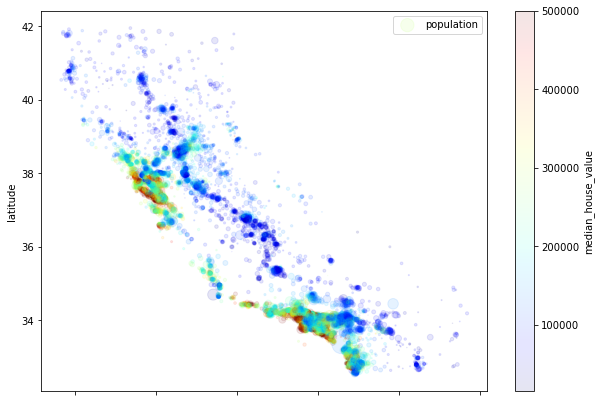

In [79]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, 
             s=housing["population"]/100, label="population", figsize=(10,7),
              c ="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [80]:
corr_matrix=housing.corr()

In [81]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

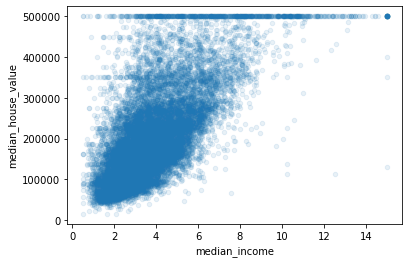

In [82]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [83]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [84]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [85]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [86]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [87]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [88]:
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [89]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [90]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [91]:
X = imputer.transform(housing_num)

In [92]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)


In [93]:
from sklearn.preprocessing import LabelEncoder  #tranforms words into numerical
encoder=LabelEncoder()
housing_cat=housing["ocean_proximity"]
housing_cat_encoder=encoder.fit_transform(housing_cat)
housing_cat_encoder

array([0, 0, 4, ..., 1, 0, 3])

In [94]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [95]:

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoder.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [96]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [97]:

from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat) 
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [98]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room 
    def fit(self, X, y=None):
        return self # nothing else to do 
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix] 
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                    bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


In [99]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")), ('attribs_adder', CombinedAttributesAdder()), ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)


In [100]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin): 
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names 
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values


In [101]:
num_attribs = list(housing_num) 
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
            ('selector', DataFrameSelector(num_attribs)), 
            ('imputer', SimpleImputer(strategy="median")), 
            ('attribs_adder', CombinedAttributesAdder()),
            ('std_scaler', StandardScaler()),
        ])
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('one_hot_encoder', OneHotEncoder(sparse=False))
    ])

In [102]:
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[ 
    ("num_pipeline", num_pipeline), 
    ("cat_pipeline", cat_pipeline),
    ])

In [103]:
housing_prepared= full_pipeline.fit_transform(housing)
housing_prepared


array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [104]:
housing_prepared.shape

(16512, 16)

In [105]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [106]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [107]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [108]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions) 
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [109]:
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [110]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions) 
tree_rmse = np.sqrt(tree_mse)
tree_rmse #not goog choice, dont use test set again , overfitting

0.0

In [111]:
from sklearn.model_selection import cross_val_score 
scores=cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [112]:
def display_score(scores):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [113]:
display_score(tree_rmse_scores)

scores: [68800.65550983 66648.35663973 69601.6366032  69885.45706673
 71726.32488458 74921.03100211 71728.44646572 71360.05465104
 76548.33119199 69811.09353058]
mean: 71103.13875455222
Standard deviation: 2749.9990801047416


In [114]:
lin_scores=cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
linreg_rmse_scores = np.sqrt(-lin_scores)
display_score(linreg_rmse_scores)

scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
mean: 69052.46136345083
Standard deviation: 2731.6740017983507


In [115]:
from sklearn.ensemble import RandomForestRegressor 
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [116]:
housing_predictions_forest = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions) 
forest_rmse = np.sqrt(tree_mse)
print(forest_rmse)

0.0


In [ ]:
housing_predictions_forest = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions) 
forest_rmse = np.sqrt(tree_mse)
print(forest_rmse)

In [118]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_score(forest_rmse_scores)


scores: [49263.20239283 47629.73753983 49426.92819229 52282.23559298
 49714.71482675 53258.08808214 48623.95475252 47953.94566096
 53223.35121476 50283.15143082]
mean: 50165.930968587614
Standard deviation: 1966.4492576270488


In [128]:
from sklearn.model_selection import GridSearchCV
param_grid=[
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {"bootstrap": [False], "n_estimators":[3,10], "max_features": [2,3,4]},
  ]
forest_reg=RandomForestRegressor()

grid_search=GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error")

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [129]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [130]:
 cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]): 
    print(np.sqrt(-mean_score), params)

64125.00974845939 {'max_features': 2, 'n_estimators': 3}
55252.32640556206 {'max_features': 2, 'n_estimators': 10}
52840.23429969973 {'max_features': 2, 'n_estimators': 30}
59647.425388779906 {'max_features': 4, 'n_estimators': 3}
52921.434944220135 {'max_features': 4, 'n_estimators': 10}
50829.74840811697 {'max_features': 4, 'n_estimators': 30}
58757.69316665271 {'max_features': 6, 'n_estimators': 3}
52256.557661613486 {'max_features': 6, 'n_estimators': 10}
50057.26954870164 {'max_features': 6, 'n_estimators': 30}
59463.059583142116 {'max_features': 8, 'n_estimators': 3}
52128.76834477655 {'max_features': 8, 'n_estimators': 10}
49694.830288251855 {'max_features': 8, 'n_estimators': 30}
62658.10488376631 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54286.235192668246 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60148.60899131829 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53073.48124005521 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [131]:
feature_importances = grid_search.best_estimator_.feature_importances_ 
feature_importances

array([6.67511449e-02, 6.13314169e-02, 4.25233518e-02, 1.44721668e-02,
       1.52123154e-02, 1.45259124e-02, 1.41269184e-02, 3.50818014e-01,
       5.03729125e-02, 1.17691953e-01, 8.34813752e-02, 2.33565539e-03,
       1.61321955e-01, 5.72093579e-05, 1.97554104e-03, 3.00215807e-03])

In [132]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"] 
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3508180138060685, 'median_income'),
 (0.16132195453610268, 'INLAND'),
 (0.11769195342294375, 'pop_per_hhold'),
 (0.08348137521811466, 'bedrooms_per_room'),
 (0.06675114492252268, 'longitude'),
 (0.06133141694916213, 'latitude'),
 (0.05037291252199347, 'rooms_per_hhold'),
 (0.04252335179183617, 'housing_median_age'),
 (0.01521231537490517, 'total_bedrooms'),
 (0.014525912390665474, 'population'),
 (0.014472166795565629, 'total_rooms'),
 (0.014126918417409621, 'households'),
 (0.0030021580700978754, 'NEAR OCEAN'),
 (0.002335655387954528, '<1H OCEAN'),
 (0.0019755410367429784, 'NEAR BAY'),
 (5.720935791471657e-05, 'ISLAND')]

In [133]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test) 
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [134]:
final_rmse

47952.629600438544